## Question 2


### Linear Regression 


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

## Data Loading 

In [20]:
data = pd.read_csv('/Users/hps/aws/Q2Regression.csv')
data.columns = ['A','B','C']

## Exploratory Data Analysis

In [21]:
#checking null values
data.isnull().sum()

A    0
B    0
C    0
dtype: int64

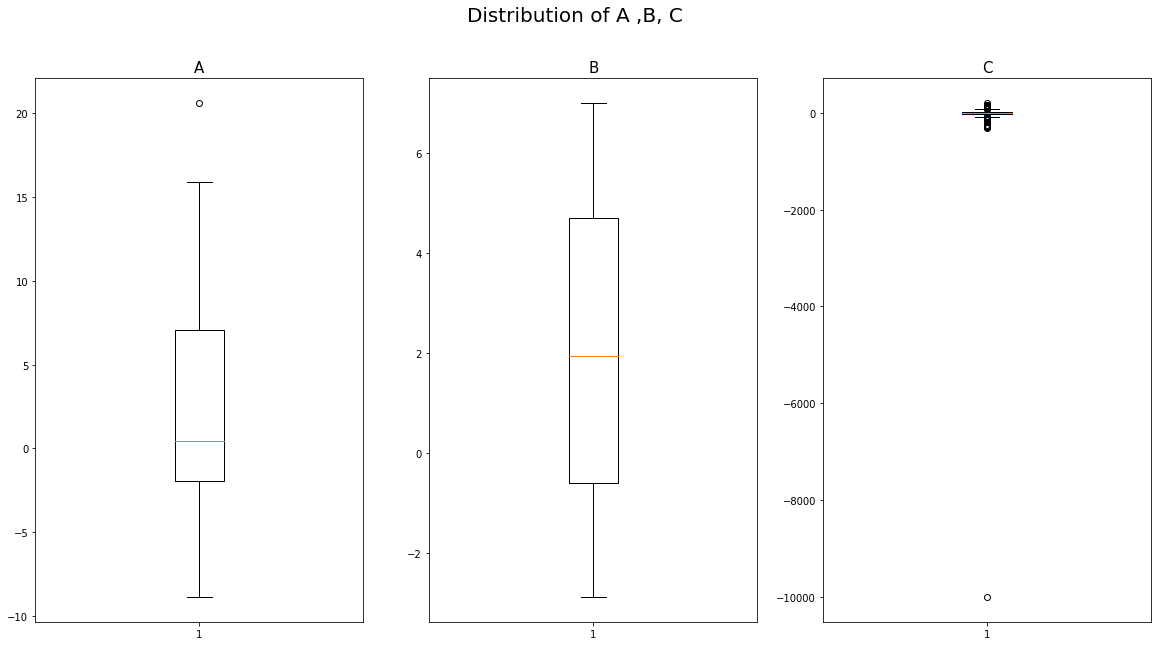

In [22]:
#plotting Distribution of 'A' ,'B', 'C'
plt.figure(figsize=(20,10))
plt.suptitle('Distribution of A ,B, C', fontsize=20)
plt.subplot(1, 3, 1)
plt.boxplot(data.A)
plt.title('A',fontsize=15)
plt.subplot(1, 3, 2)
plt.boxplot(data.B)
plt.title('B',fontsize=15)
plt.subplot(1, 3, 3)
plt.boxplot(data.C)
plt.title('C',fontsize=15)
plt.show()

Based on the above chart there is a outlier present in 'C' and there data cleasing is required. 


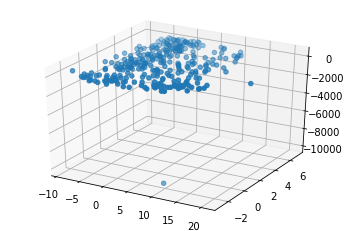

In [23]:
# Plotting 'A','B' and 'C' in a 3D axis to check the linearity
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data['A'], data['B'], data['C'])
plt.show()

We could see the outlier is effectinf the entire pot let's remove it check the distribution

In [24]:
# remove outliers
data = data.drop(data['C'].idxmin())

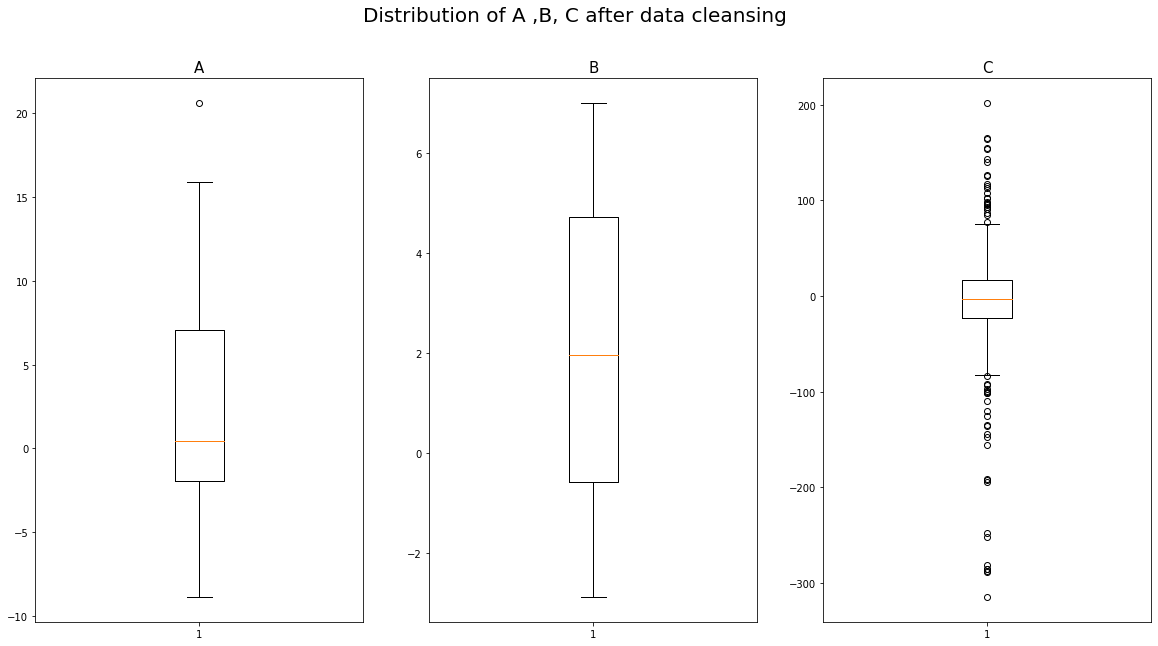

In [25]:
#plotting Distribution of 'A' ,'B', 'C' after Data Cleansing
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.boxplot(data.A)
plt.title('A',fontsize=15)
plt.subplot(1, 3, 2)
plt.boxplot(data.B)
plt.title('B',fontsize=15)
plt.subplot(1, 3, 3)
plt.boxplot(data.C)
plt.title('C',fontsize=15)
plt.suptitle('Distribution of A ,B, C after data cleansing' , fontsize=20)
plt.show()

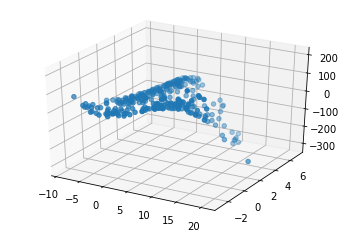

In [17]:
# Plotting 'A','B' and 'C' in a 3D axis to check the linearity
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data['A'], data['B'], data['C'])
plt.show()

After removing the outliers in 'C' , Based on the above plot we could see that there is no linearity. Let us see the distibution of the dependednt Variable and each Independent Variable

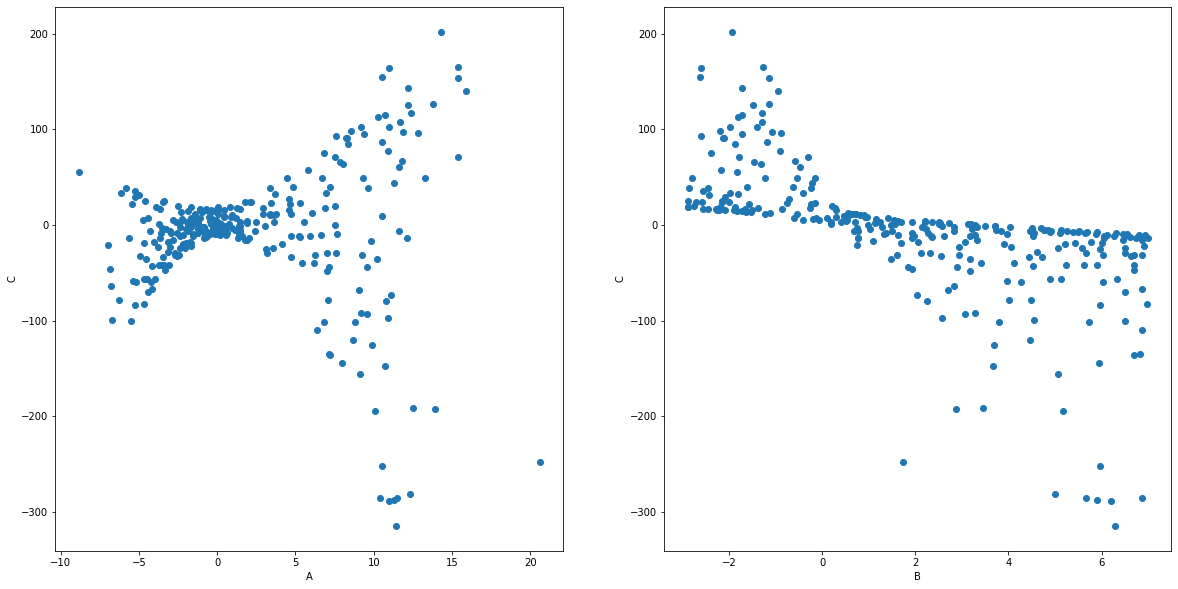

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.scatter(data['A'],data['C'] )
plt.xlabel('A')
plt.ylabel('C')
plt.subplot(1,2, 2)
plt.scatter(data['B'], data['C'])
plt.xlabel('B')
plt.ylabel('C')
plt.show()

## Linear Regression

 We need to build a regression model with 'A' and 'B' as the independent variable that explains the behaviour of the dependant variable 'C'.

The Model can be represented as follows:


   C = $\beta0$ + $\beta1 * A$ + $\beta2 * B$ 
       
   Y = $\beta^t * X $
   
Therefore,
   
   $\beta$={ $\beta0$, $\beta1$, $\beta2$ }
   
   X = {A,B}
   
   Y = {c}

Cost function: 
  
   J($\beta$) = 1$/$2n * $\sum\limits_{i = 1}^{m}$ $(\beta^t x^i - y^i) ^2$

In order to optimize the cost funtion we need to minimize the cost by choosing the correct $\beta$ values.

## Gradient descent 

Cost funtion for the linear regression algorithm is convex shape and therefore the optimization of the $\beta$ values is obtained when we reach the golbal minima of the cost function. 

### Gradient decent algorithm is implemented by the following steps

(i) Initialize the $\beta$ values as zero 
     
     $\beta$ = { 0,0,0}
 
(ii) Iteratively updating the $\beta$ based on the first derivitive of the cost function until the minima is obtained

Thus the following is the implementation of the linear regression
                    

In [40]:
# Obtaining the dependant and independant features
X = data.iloc[:, 0:2]
ones = np.ones([X.shape[0], 1])  
X = np.concatenate([ones, X],1) 
Y = data.iloc[:, 2:3]

In [41]:
# Creating the 'X' and 'Y' numpy arrays for the equation Y= mX + C  

X = data.iloc[:,0:2] 
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1) 

Y = data.iloc[:,2:3].values

beta = np.zeros([1,3])

# set Learning rate an

alpha = 0.01 # learning rate
n = 1000 # number of iterations

In [42]:
def costFunction(X,Y,beta):
    squared_residuals = np.power((X@beta.T-Y),2)
    sum_squared_residuals = np.sum(squared_residuals)
    n = len(X)
    J = sum_squared_residuals/(2*n)
    return J

def gradientDescent(X, Y, beta,alpha, n):
    cost = np.zeros(n) # initial costs are 0
    for i in range(n):
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis = 0) 
        cost[i] = costFunction(X, Y, beta) # update cost 
    return beta, cost

In [43]:
g, cost = gradientDescent(X, Y, beta, alpha, n)  
print(g)

[[ 25.82931267  -1.37161116 -15.23751096]]


Text(0, 0.5, 'Cost')

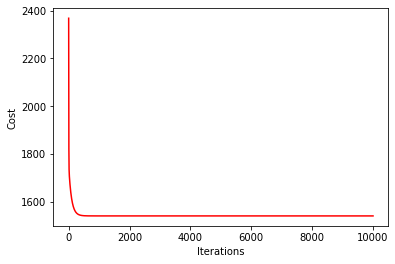

In [51]:
# Plooting the cost against the iterations
fig,ax = plt.subplots()
ax.plot(np.arange(n),cost, 'r')
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')

In [78]:
def rmse(Y, y_pred):
    rmse = np.sqrt(sum((Y - y_pred) ** 2) / len(Y))
    return rmse.item()

def r2_score(Y, y_pred):
    mean = np.mean(Y)
    sst = sum((Y - mean) ** 2)
    sse = sum((Y - y_pred) ** 2)
    r2 = 1 - (sse / sst)
    return r2.item()

In [79]:
y_pred = X.dot(g.T) # get estimated y
RMSE = rmse(Y,y_pred)
print('RMSE :',RMSE)
r2 = r2_score(Y,y_pred)
print('R2 :',r2)

RMSE : 33.577311160522285
R2 : 0.7783036305225455


As we see, above the R2 value is too low and based on the visualiation of the dependant and independant variables we can get that the variables are not linear and therefore a higher polynomial degree is used.

Therefore the polynomial function with degree 2 is 

C = $\beta0$ + $\beta1A$ + $\beta2B$ +$\beta3A^2$ + $\beta4B^2$ + $\beta5AB$ 

As the higher variables are used we need to normalize the A and B variables inorder to avoid over shooting of cost functions


In [80]:
# Creating the Independant and dependant variables
X2 = data.iloc[:,0:2] # get A and B
X2['A'] = (data['A'] - data['A'].mean())/(data['A'].std()) # standardize
X2['A2'] = X2['A']**2 # add quadratic term
X2['B'] = (data['B'] - data['B'].mean())/(data['B'].std())
X2['B2'] = X2['B']**2 # add quadratic term
X2['AB'] = data['A']*data['B']
ones = np.ones([X2.shape[0], 1])  
X2 = np.concatenate([ones, X2],1)
beta = np.ones([1,6]) # initilize beta, change the size because add new variable

# set hyper_parameters
alpha = 0.01 # learning rate
n = 1000 # number of iterations

Y = data.iloc[:,2:3].values



/Users/hps/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
g, cost = gradientDescent(X2, Y, beta, alpha, n)  
print(g)

[[ -4.20485742  -9.3836575  -51.66646824 -15.42460016   2.64910557
  -45.94296641]]


In [82]:
y_pred = X2.dot(g.T) # get estimated y
RMSE = rmse(Y,y_pred)
print('RMSE :',RMSE)
r2 = r2_score(Y,y_pred)
print('R2 :',r2)

RMSE is 33.57731116052228
R2 score is 0.7783036305225455


Text(0, 0.5, 'Cost')

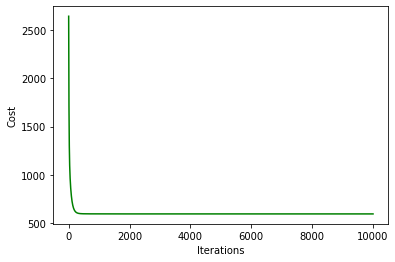

In [90]:
fig, ax = plt.subplots()
ax.plot(np.arange(n),cost, 'g')
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')

Trying the higher degree polynominal with degree 3..

C = $\beta0$ + $\beta1A$ + $\beta2B$ +$\beta3A^2$ + $\beta4B^2$ + $\beta5A^2B$ +  $\beta6 AB^2$

In [85]:
# Creating the Independant and dependant variables
X3 = data.iloc[:,0:2] # get A and B
X3['A'] = (data['A'] - data['A'].mean())/(data['A'].std()) # standardize
X3['A2'] = X3['A']**3 # add quadratic term
X3['B'] = (data['B'] - data['B'].mean())/(data['B'].std())
X3['B2'] = X3['B']**3 # add quadratic term
X3['A2B'] = data['A']*data['B']*data['A']
X3['AB2'] = data['A']*data['B']*data['B']
ones = np.ones([X2.shape[0], 1])  
X3 = np.concatenate([ones, X3],1)
beta = np.ones([1,7]) # initilize beta, change the size because add new variable

# set hyper_parameters
alpha = 0.01 # learning rate
n = 1000 # number of iterations

Y = data.iloc[:,2:3].values

/Users/hps/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
g, cost = gradientDescent(X3, Y, beta, alpha, n)  
print(g)

[[-13.39863619  -5.93462671 -10.28007988  -7.0934072    3.82368193
  -45.01395562   3.7058048 ]]


In [88]:
y_pred = X3.dot(g.T) # get estimated y
RMSE = rmse(Y,y_pred)
print('RMSE :',RMSE)
r2 = r2_score(Y,y_pred)
print('R2 :',r2)

RMSE is 34.42266795680142
R2 score is 0.7670000618169879


Text(0, 0.5, 'Cost')

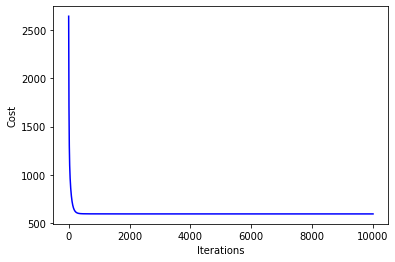

In [89]:
fig, ax = plt.subplots()
ax.plot(np.arange(n),cost, 'b')
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')

As we see above the cost function and RMSE value is low for the degree 2 polynomial and therefore the linear regression function for the Independant variable A and B and dependant C is :

C = $\beta0$ + $\beta1A$ + $\beta2B$ +$\beta3A^2$ + $\beta4B^2$ + $\beta5AB$ 

With, 

RMSE : 33.57731116052228

R2 score : 0.7783036305225455